# Comparative analysis boundaries 5kb

In [5]:
#creating a list of non-conseved boundaries (of group 1 TADs)
!awk -v OFS='\t' '{print $1, $2 - 2500, $2 + 2500; print $1, $3 - 2500, $3 + 2500}' NPB_TADs_1.bed > NPB_boundaries_non.bed

In [3]:
#creating a list of conserved boundaries (group 4+5 TADs)
# Initialize the output file
> NPB_boundaries_non.bed

# List of input files
input_files=("NPB_TADs_4.bed" "NPB_TADs_5.bed")

# Loop through the input files
for input_file in "${input_files[@]}"; do
  # Process each input file and append the results to the output file
  awk -v OFS='\t' '{print $1, $2 - 2500, $2 + 2500; print $1, $3 - 2500, $3 + 2500}' "$input_file" >> NPB_boundaries_cons.bed
done

In [4]:
#tab-delimited
sed -i 's/,/\t/g' NPB_boundaries_cons.bed

In [7]:
#sorting
!sort -k1,1 -k2,2n -k3,3n -o NPB_boundaries_cons.bed NPB_boundaries_cons.bed
!sort -k1,1 -k2,2n -k3,3n -o NPB_boundaries_non.bed NPB_boundaries_non.bed

In [ ]:
#analysis of all features
import os
working_directory = '/scratch/ak8725/comparative_TADs_boundaries/'
os.chdir(working_directory)

from pybedtools import BedTool

# Create a dictionary to store BedTool objects with their names as keys
bedtools_dict = {
    'pro': BedTool('/scratch/ak8725/az_mrg/fitcons/from_zoe/PRO-seq.bedgraph'),
    'meth': BedTool('/scratch/ak8725/az_mrg/fitcons/from_zoe/methylation_from_zoe.bedgraph'),
    'H3K18ac': BedTool('/scratch/ak8725/az_mrg/fitcons/from_zoe/H3K18ac.bedgraph'),
    'H3K27ac': BedTool('/scratch/ak8725/az_mrg/fitcons/from_zoe/H3K27ac.bedgraph'),
    'H3K27me3': BedTool('/scratch/ak8725/az_mrg/fitcons/from_zoe/H3K27me3.bedgraph'),
    'H3K4me3': BedTool('/scratch/ak8725/az_mrg/fitcons/from_zoe/H3K4me3.bedgraph'),
    'rho': BedTool('/scratch/ak8725/az_mrg/fitcons/from_zoe/rho.bedgraph'),
    'phast': BedTool('/scratch/ak8725/az_mrg/fitcons/from_zoe/PhastCons8wayChrAll.bedgraph'),
    'genes': BedTool('/scratch/ak8725/npb_feature_tracks/npb_genes_per_500bp.bedgraph'),
    'gc': BedTool('/scratch/ak8725/npb_feature_tracks/npb_GC_content_per_500bp.bedgraph'),
    'sv': BedTool('/scratch/ak8725/npb_feature_tracks/npb_sv_per_500bp.bedgraph'),
    'snp': BedTool('/scratch/ak8725/npb_feature_tracks/npb_snp_per_500bp.bedgraph'),
    'te': BedTool('/scratch/ak8725/npb_feature_tracks/npb_te_per_500bp.bedgraph'),
    'dna_te': BedTool('/scratch/ak8725/npb_feature_tracks/npb_dna_te_per_500bp.bedgraph'),
    'gypsy': BedTool('/scratch/ak8725/npb_feature_tracks/npb_gypsy_per_500bp.bedgraph'),
    'copia': BedTool('/scratch/ak8725/npb_feature_tracks/npb_copia_per_500bp.bedgraph'),
    'line': BedTool('/scratch/ak8725/npb_feature_tracks/npb_line_per_500bp.bedgraph'),
    'sine': BedTool('/scratch/ak8725/npb_feature_tracks/npb_sine_per_500bp.bedgraph'),
    'rest_retro_te': BedTool('/scratch/ak8725/npb_feature_tracks/npb_rest_retro_te_per_500bp.bedgraph'),
    'ssd': BedTool('/scratch/ak8725/npb_feature_tracks/ssd_genes_per_500bp.bedgraph'),
    'wgd': BedTool('/scratch/ak8725/npb_feature_tracks/wgd_genes_per_500bp.bedgraph'),
    'exp': BedTool('/scratch/ak8725/expression/Azu_field2017_Normal.bed')
}

cons = BedTool('NPB_boundaries_cons.bed')
non = BedTool('NPB_boundaries_non.bed')

# Define the list of output file names
output_files = [
    'cons.txt',
    'non.txt'
]

#calculating mean feature value per mode
for obj_name, obj in bedtools_dict.items():
    for output_file in output_files:
        output_name = f'{obj_name}_{output_file}'  # Generate output file name based on object name and output file type
        
        # Use mode1 and mode2 BedTool objects instead of obj
        if "cons" in output_name:
            result = cons.map(obj, c=4, o='mean', output=output_name)
        elif "non" in output_name:
            result = non.map(obj, c=4, o='mean', output=output_name)
        
        print(f'Mean {obj_name} per window calculated, output saved as {output_name}')

***** WARNING: File NPB_boundaries_cons.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	11187500	11192500

***** WARNING: File NPB_boundaries_cons.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	11187500	11192500

***** WARNING: File NPB_boundaries_non.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	347500	352500

***** WARNING: File NPB_boundaries_non.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	347500	352500



Mean pro per window calculated, output saved as pro_cons.txt
Mean pro per window calculated, output saved as pro_non.txt


***** WARNING: File NPB_boundaries_cons.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	11187500	11192500

***** WARNING: File NPB_boundaries_cons.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	11187500	11192500



Mean meth per window calculated, output saved as meth_cons.txt


In [10]:
import os
working_directory = '/scratch/ak8725/comparative_TADs_boundaries/'
os.chdir(working_directory)

import pandas as pd
from scipy import stats

# Initialize an empty list to store p-values
p_values = []

# Iterate through the BedTool objects in bedtools_dict
for key, obj in bedtools_dict.items():
    # Generate the output file names for mode1 and mode2 based on the key
    low_file = f'{key}_cons.txt'
    high_file = f'{key}_non.txt'
    
    # Load data from right and left files
    low_data = pd.read_csv(low_file, sep='\t', header=None, names=['chr', 'start', 'end', 'value'])
    high_data = pd.read_csv(high_file, sep='\t', header=None, names=['chr', 'start', 'end', 'value'])
    
    # Filter out rows where 'value' is not numeric
    low_data = low_data[low_data['value'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
    high_data = high_data[high_data['value'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
    
    # Perform the Mann-Whitney U test for mode1 and mode2
    u_statistic, p_value = stats.mannwhitneyu(low_data['value'].astype(float), high_data['value'].astype(float), alternative='two-sided')
    
    # Append the p-value to the p_values list
    p_values.append((key, p_value))

# Print the list of p-values
for key, p_value in p_values:
    print(f'P-value for {key}: {p_value}')

P-value for pro: 0.0992135919476719
P-value for meth: 6.021221227088643e-05
P-value for H3K18ac: 0.562168981171772
P-value for H3K27ac: 5.0345504703353574e-06
P-value for H3K27me3: 0.010165931682031476
P-value for H3K4me3: 2.169175762578487e-07
P-value for rho: 5.638824588719069e-14
P-value for phast: 4.243707753870078e-10
P-value for genes: 5.579275560785503e-08
P-value for gc: 0.016945784921014867
P-value for sv: 0.002140572799834279
P-value for snp: 1.8722384539618183e-12
P-value for te: 4.470614774684747e-15
P-value for dna_te: 0.0028393881886218564
P-value for gypsy: 1.3228205981536042e-06
P-value for copia: 1.2595950105793073e-05
P-value for line: 0.21890425033881922
P-value for sine: 0.2862241066509307
P-value for rest_retro_te: 0.24433847277733878
P-value for ssd: 0.001753157884299679
P-value for wgd: 0.0015033628092991057
P-value for exp: 0.0027406850100203297


In [3]:
#plotting: exp without outliers

import os
os.chdir('/scratch/ak8725/comparative_TADs_boundaries_liftover_analysis//')

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of file pairs and their corresponding p-values
file_pairs = [
    {'key': 'pro', 'p-value': 0.099, 'title': 'PRO-seq'},
    {'key': 'meth', 'p-value': 6.02e-05, 'title': 'DNA methylation'},
    {'key': 'H3K18ac', 'p-value': 0.562, 'title': 'H3K18ac'},
    {'key': 'H3K27ac', 'p-value': 5.03e-06, 'title': 'H3K27ac'},
    {'key': 'H3K27me3', 'p-value': 0.010, 'title': 'H3K27me3'},
    {'key': 'H3K4me3', 'p-value': 2.17e-07, 'title': 'H3K4me3'},
    {'key': 'rho', 'p-value': 5.64e-14, 'title': 'Fitcons scores'},
    {'key': 'phast', 'p-value': 4.24e-10, 'title': 'PhastCons scores'},
    {'key': 'genes', 'p-value': 5.58e-08, 'title': 'Gene density'},
    {'key': 'gc', 'p-value': 0.017, 'title': 'GC content'},
    {'key': 'sv', 'p-value': 0.002, 'title': 'SV breakpoint density'},
    {'key': 'snp', 'p-value': 1.87e-12, 'title': 'SNP density'},
    {'key': 'te', 'p-value': 4.47e-15, 'title': 'TE density'},
    {'key': 'dna_te', 'p-value': 2.83e-03, 'title': 'DNA transposons density'},
    {'key': 'gypsy', 'p-value': 1.32e-06, 'title': 'gypsy density'},
    {'key': 'copia', 'p-value': 1.26e-05, 'title': 'copia density'},
    {'key': 'line', 'p-value': 0.219, 'title': 'LINE density'},
    {'key': 'sine', 'p-value': 0.286, 'title': 'SINE density'},
    {'key': 'rest_retro_te', 'p-value': 0.244, 'title': 'Other retrotransposons'},
    {'key': 'ssd', 'p-value': 0.002, 'title': 'SSD genes'},
    {'key': 'wgd', 'p-value': 0.001, 'title': 'WGD genes'},
    {'key': 'exp', 'p-value': 0.002, 'title': 'RNA-seq'}
]


# Set the directory where your files are located
data_dir = '/scratch/ak8725/comparative_TADs_boundaries_liftover_analysis//'

# Loop through each file pair and create a box plot
for pair in file_pairs:
    key = pair['key']
    p_value = pair['p-value']
    title = pair['title']

    # Load data from files into DataFrames
    low_data = pd.read_csv(os.path.join(data_dir, f'{key}_cons.txt'), sep='\t', header=None, names=['chr', 'start', 'end', 'col4'])
    high_data = pd.read_csv(os.path.join(data_dir, f'{key}_non.txt'), sep='\t', header=None, names=['chr', 'start', 'end', 'col4'])
    
    # Keys for which you want to remove outliers
    keys_to_remove_outliers = ['exp']

    # Convert 'col4' to numeric, handling errors with 'coerce' to replace non-numeric values with NaN
    low_data['col4'] = pd.to_numeric(low_data['col4'], errors='coerce')
    high_data['col4'] = pd.to_numeric(high_data['col4'], errors='coerce')

    # Remove rows with NaN values in 'col4'
    low_data = low_data.dropna(subset=['col4'])
    high_data = high_data.dropna(subset=['col4'])
    
    # Remove outliers for specified keys
    if key in keys_to_remove_outliers:
        low_data = low_data[~((low_data['col4'] - low_data['col4'].mean()).abs() > 2 * low_data['col4'].std())]
        high_data = high_data[~((high_data['col4'] - high_data['col4'].mean()).abs() > 2 * high_data['col4'].std())]
    
    # Create a combined DataFrame for both groups
    combined_data = pd.concat([low_data, high_data], keys=['Conserved', 'Non-conserved'])

    # Create transparent box plots with customized colors
    fig, ax = plt.subplots(figsize=(5, 5))

    # Define custom colors for the box plots and points
    boxplot_colors = ['palegreen', 'lightyellow']
    point_colors = 'black'

    # Create box plots with custom colors
    b = sns.boxplot(data=combined_data, x=combined_data.index.get_level_values(0), y='col4', width=0.7, fliersize=0,
                palette=boxplot_colors, medianprops=dict(color='black', linewidth=2.5))
    
    # Add significance stars based on the p-value
    if p_value < 0.0001:
        significance = '****'
    elif p_value < 0.001:
        significance = '***'
    elif p_value < 0.01:
        significance = '**'
    elif p_value < 0.05:
        significance = '*'
    else:
        significance = 'ns'
        
    # Customize the plot
    ax.set_xlabel('Boundaries')
    ax.set_ylabel('')
    sns.despine(offset=5, trim=True)

    # Add the main title
    fig.suptitle(f'{title}', fontsize=28)  # Main title specific to each plot

    # Add the significance title
    ax.set_title(f"{significance}", fontsize=24)

    plt.tight_layout()
    plt.savefig(f'{key}.pdf', bbox_inches='tight')  # Save each plot with a unique name
    plt.close()

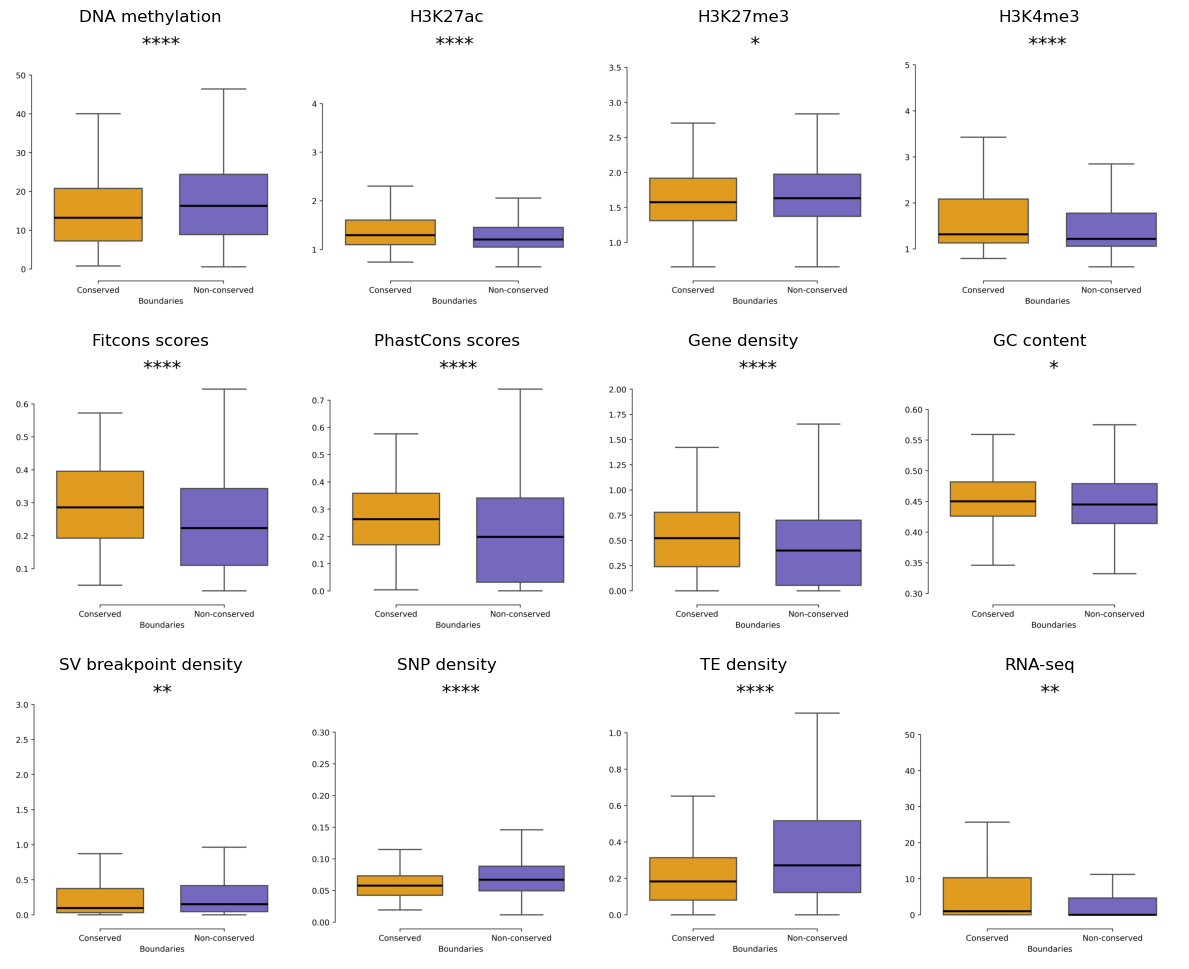

In [6]:
#combining plots excluding line,sine,rest_retro_te,ssd,wgd,copia
import os
import matplotlib.pyplot as plt
import math

# Directory containing your .png files
png_dir = '/scratch/ak8725/comparative_TADs_boundaries_liftover_analysis//'

# Define the order and titles for each image
image_order = [
    {'filename': 'meth.png', 'title': 'DNA methylation'},
    {'filename': 'H3K27ac.png', 'title': 'H3K27ac'},
    {'filename': 'H3K27me3.png', 'title': 'H3K27me3'},
    {'filename': 'H3K4me3.png', 'title': 'H3K4me3'},
    {'filename': 'rho.png', 'title': 'Fitcons scores'},
    {'filename': 'phast.png', 'title': 'PhastCons scores'},
    {'filename': 'genes.png', 'title': 'Gene density'},
    {'filename': 'gc.png', 'title': 'GC content'},
    {'filename': 'sv.png', 'title': 'SV breakpoint density'},
    {'filename': 'snp.png', 'title': 'SNP density'},
    {'filename': 'te.png', 'title': 'TE density'},
    {'filename': 'exp.png', 'title': 'RNA-seq'},
]

# Create a dictionary to map filenames to image_info dictionaries
image_info_dict = {entry['filename']: entry for entry in image_order}

# List of filenames sorted in the desired order
sorted_filenames = [
    'meth.png', 'H3K27ac.png', 'H3K27me3.png',
    'H3K4me3.png', 'rho.png', 'phast.png', 'genes.png', 'gc.png',
    'sv.png', 'snp.png', 'te.png', 'exp.png'
]

# Calculate the number of rows and columns in the grid based on the number of images
num_images = len(sorted_filenames)
num_cols = 4
num_rows = math.ceil(num_images / num_cols)

# # Specify the height ratio for subplots (reduce the height ratio for tighter rows)
# #height_ratios = [1, 0.6]  # Adjust as needed

# # Calculate the figsize based on the height ratios and number of columns
# fig_width = 12
# fig_height = fig_width * (sum(height_ratios) / num_cols)

# # Create a new figure for the combined image with adjusted height ratio
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height), gridspec_kw={'height_ratios': height_ratios})

# Create a new figure for the combined image
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Iterate through the list of filenames and plot images in the specified order
for i, filename in enumerate(sorted_filenames):
    row = i // num_cols
    col = i % num_cols
    img = plt.imread(os.path.join(png_dir, filename))
    
    # Plot the image on the corresponding subplot
    axes[row, col].imshow(img)
    axes[row, col].axis('off')  # Turn off axis labels and ticks
    
    image_info = image_info_dict.get(filename, {})
    title = image_info.get("title", "")
    
    # Add the title with the optional asterisk
    axes[row, col].set_title(title)

# Adjust spacing between subplots
plt.tight_layout()

# Save the combined image
plt.savefig('/scratch/ak8725/figs/fig9.pdf')

# Show the combined image (optional)
plt.show()